
# Exercise 4

In a chemical process, 70 consecutive measurements were made over time for a given quality characteristic of interest. Data are stored in `ESE4_ex4.csv` (series ‘F’ “Time Series Analysis – 3rd edition” Box Jenkins Reinsel – Prentice Hall) 


Estimate the most suitable ARIMA model.

In [4]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

# Import the dataset
data = pd.read_csv('ESE4_ex4.csv')

# Inspect the dataset
data.head()

,EXE4
0,47
1,64
2,23
3,71
4,38


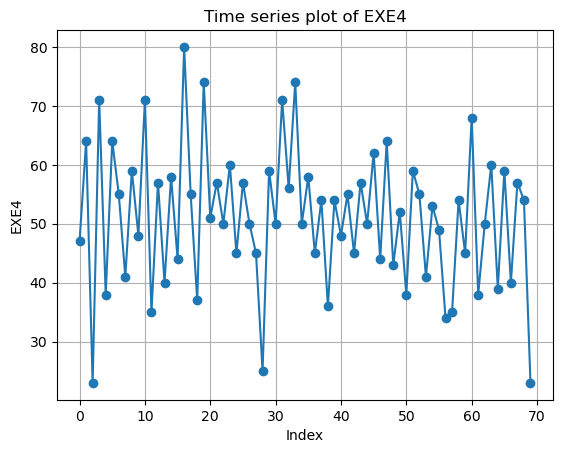

In [5]:
# Plot the data 
plt.plot(data['EXE4'], 'o-')
plt.xlabel('Index')
plt.ylabel('EXE4')
plt.title('Time series plot of EXE4')
plt.grid()
plt.show()

> We observe a very high number of runs  
>
> <t1 style="color:red"> REMIND: typical pattern of negatively correlated process </t1>
>
> Systematic variation of observations above and below the mean

Runs test p-value = 0.000


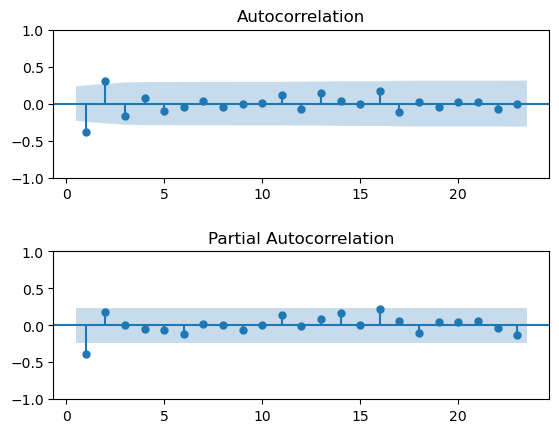

In [6]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['EXE4'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['EXE4'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['EXE4'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> Some considerations:
> - It looks almost stationary
> - Geometric decay of ACF?
> - Most suitable model may be $AR(1)$ (with negative coeff.)

In [7]:
#calculate an ARIMA model: import the necessary library
import qda

# fit model ARIMA with constant term
model = qda.ARIMA(data['EXE4'], order=(1,0,0), add_constant=True)

qda.ARIMAsummary(model)


---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=1, d=0, q=0

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term    Coef  SE Coef  T-Value  P-Value
const 51.2662   0.9197  55.7451   0.0000
ar.L1 -0.4191   0.1206  -3.4748   0.0005

RESIDUAL SUM OF SQUARES
-------------------------
  DF        SS       MS
68.0 8147.0993 119.8103

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12      6.5548   0.8856
  24     17.7915   0.8130
  36     23.2315   0.9506
  48     32.1413   0.9618


> The calculated ARIMA model is:
>
> $X_t =  51.2662 - 0.41491 X_{t-1} + \epsilon_t $
>
> Finally, check the assumptions on residuals

Shapiro-Wilk test p-value = 0.279


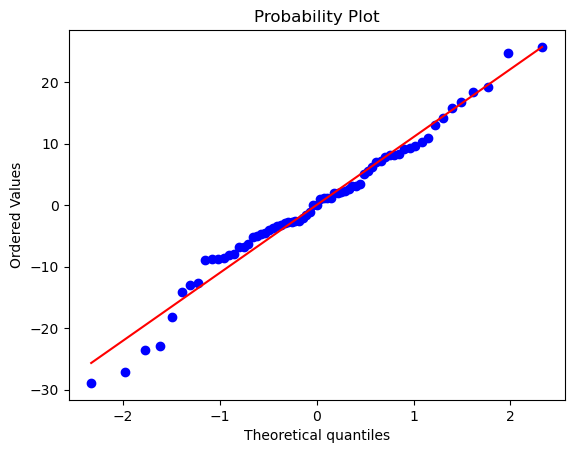

In [8]:
#extract the residuals
residuals = model.resid[1:] 

# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

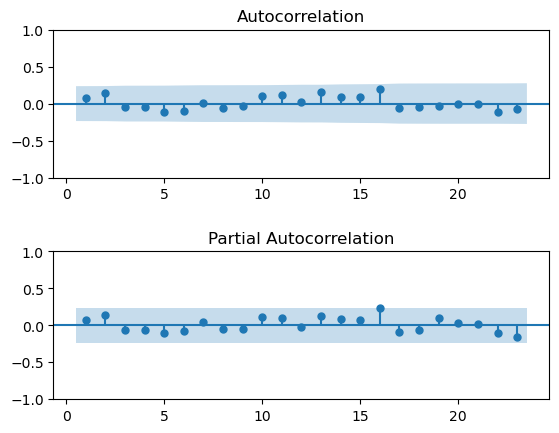

In [9]:
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

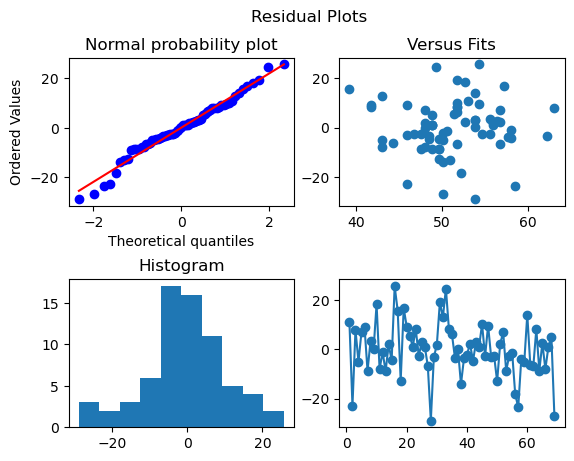

In [10]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues[1:], model.resid[1:])
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

> The model is adequate.
>
> The implementation of an $AR(1)$ can be done also solved with a linear regression, using as regressor the LAG1 of the series.

In [11]:
#calculate a regression model with constant and lag1
data['lag1'] = data['EXE4'].shift(1)

import statsmodels.api as sm

x = data['lag1'][1:]
x = sm.add_constant(data['lag1'][1:]) # this command is used to consider a constant to the model, is equivalent to create and add a column of ones
y = data['EXE4'][1:]
model = sm.OLS(y, x).fit()
qda.summary(model)

REGRESSION EQUATION
-------------------
EXE4 =  + 73.086 const -0.425 lag1

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const 73.0863   6.1411  11.9013 3.4846e-18
 lag1 -0.4249   0.1163  -3.6522 5.1101e-04

MODEL SUMMARY
-------------
      S  R-sq  R-sq(adj)
11.0269 0.166     0.1536

ANALYSIS OF VARIANCE
---------------------
    Source   DF     Adj SS     Adj MS  F-Value    P-Value
Regression  1.0  1621.8423  1621.8423  13.3383 5.1101e-04
     const  1.0 17222.3684 17222.3684 141.6399 3.4846e-18
      lag1  1.0  1621.8423  1621.8423  13.3383 5.1101e-04
     Error 67.0  8146.7084   121.5927      NaN        NaN
     Total 68.0  9768.5507        NaN      NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.271
Runs test p-value on the residuals = 0.543


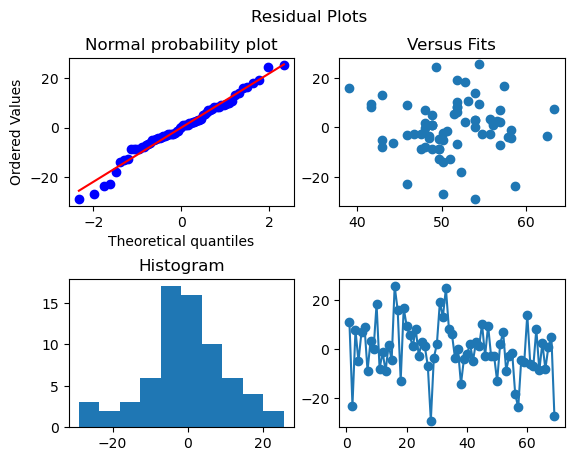

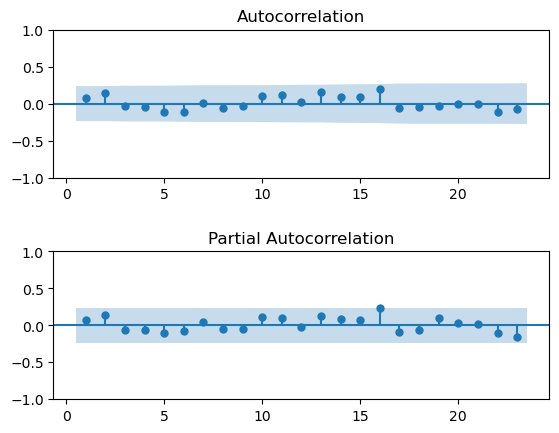

In [12]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
axs[1,0].hist(model.resid)
fig.subplots_adjust(hspace=0.5)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

# Runs test and ACF/PACF
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> <h3 style="color:red">Notice:</h3>
>
> The coefficients of the AR(1) model fitted with ARIMA command are slightly different from the ones of the same model fitted with ordinary least squares because two different solvers are used.
>
> <h3 style="color:red"> Remind that: </h3> 
> 'All models are wrong, but some are useful' (George E. P. Box)